In [1]:
# imports from Qiskit
import numpy as np
import qiskit
from qiskit.visualization import plot_histogram
from qiskit.tools.visualization import plot_state_city
from qiskit.tools.monitor import job_monitor
import random
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, Aer
# from qiskit import IBMQ

%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [2]:
# imports from backend providers (IBM for superconductor, AQT for trapped ion)
from qiskit.providers.ibmq import IBMQ
# from qiskit.providers.aqt import AQT

ibmq_provider = IBMQ.load_account()        # credentials stored on disk

simulator = ibmq_provider.get_backend('ibmq_qasm_simulator')
device = ibmq_provider.get_backend('ibmq_burlington')

# simple function that applies a series of unitary gates from a given string
def apply_secret_unitary(secret_unitary, qubit, quantum_circuit, dagger):
    functionmap = {
                    'x':quantum_circuit.x,
                    'y':quantum_circuit.y,
                    'z':quantum_circuit.z,
                    'h':quantum_circuit.h,                    
                    't':quantum_circuit.t,                    
    }
    if dagger: functionmap['t'] = quantum_circuit.tdg
    
    if dagger:
        [functionmap[unitary](qubit) for unitary in secret_unitary]
    else:
        [functionmap[unitary](qubit) for unitary in secret_unitary[::-1]]

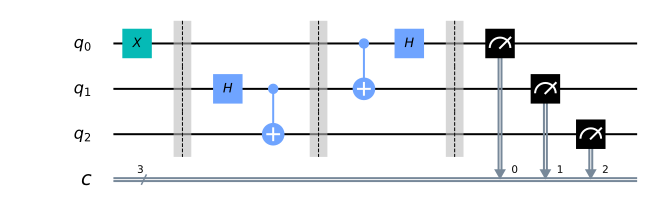

In [3]:
secret_unitary = 'x'
n = 3
qc1 = QuantumCircuit(n, n)
apply_secret_unitary(secret_unitary, qc1.qubits[0], qc1, dagger = 0)
qc1.barrier()
qc1.h(1)
qc1.cx(1,2)
qc1.barrier()
qc1.cx(0,1)
qc1.h(0)
qc1.barrier()
qc1.measure([0,1,2],[0,1,2])
qc1.draw(output='mpl')

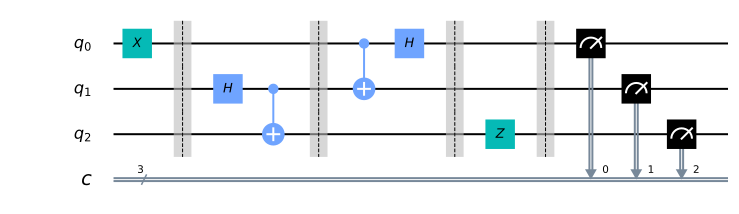

In [4]:
qc2 = QuantumCircuit(n, n)
apply_secret_unitary(secret_unitary, qc2.qubits[0], qc2, dagger = 0)
qc2.barrier()
qc2.h(1)
qc2.cx(1,2)
qc2.barrier()
qc2.cx(0,1)
qc2.h(0)
qc2.barrier()
qc2.z(2)
qc2.barrier()
qc2.measure([0,1,2],[0,1,2])
qc2.draw(output='mpl')

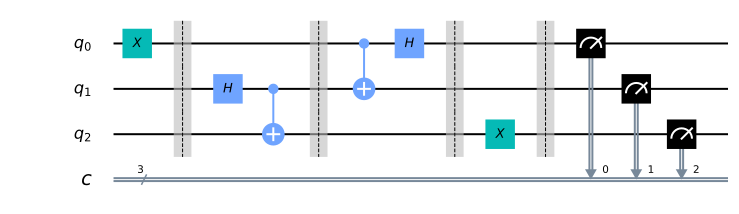

In [5]:
qc3 = QuantumCircuit(n, n)
apply_secret_unitary(secret_unitary, qc3.qubits[0], qc3, dagger = 0)
qc3.barrier()
qc3.h(1)
qc3.cx(1,2)
qc3.barrier()
qc3.cx(0,1)
qc3.h(0)
qc3.barrier()
qc3.x(2)
qc3.barrier()
qc3.measure([0,1,2],[0,1,2])
qc3.draw(output='mpl')

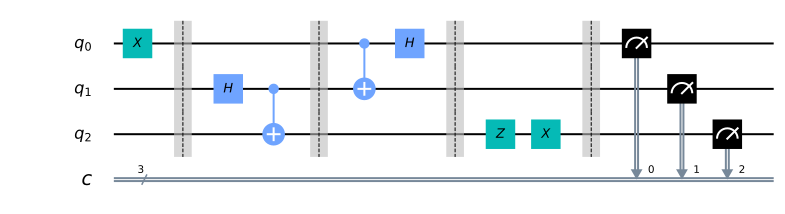

In [6]:
qc4 = QuantumCircuit(n, n)
apply_secret_unitary(secret_unitary, qc4.qubits[0], qc4, dagger = 0)
qc4.barrier()
qc4.h(1)
qc4.cx(1,2)
qc4.barrier()
qc4.cx(0,1)
qc4.h(0)
qc4.barrier()
qc4.z(2)
qc4.x(2)
qc4.barrier()
qc4.measure([0,1,2],[0,1,2])
qc4.draw(output='mpl')

In [7]:
# display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

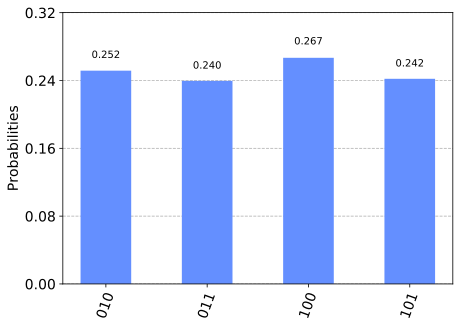

{'101': 605, '011': 599, '100': 667, '010': 629, '000': 0, '111': 0, '001': 0, '110': 0}
Done


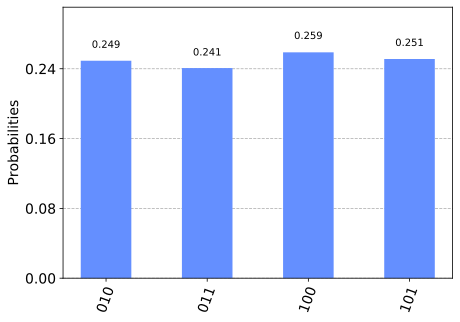

{'101': 628, '011': 602, '100': 647, '010': 623, '000': 0, '111': 0, '001': 0, '110': 0}
Done


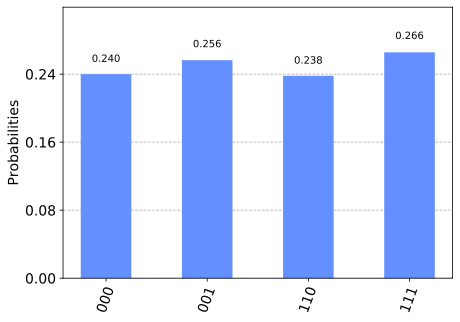

{'000': 600, '110': 595, '001': 641, '111': 664, '100': 0, '101': 0, '011': 0, '010': 0}
Done


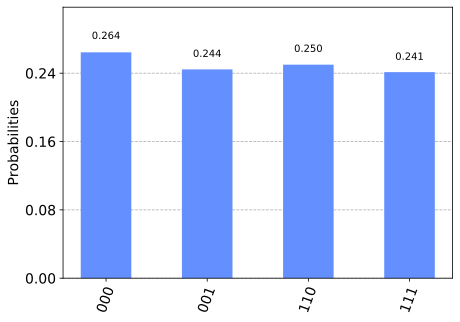

{'000': 661, '110': 625, '001': 611, '111': 603, '100': 0, '101': 0, '011': 0, '010': 0}
Done


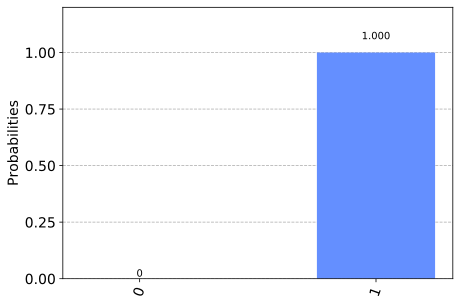

Job Status: job has successfully run


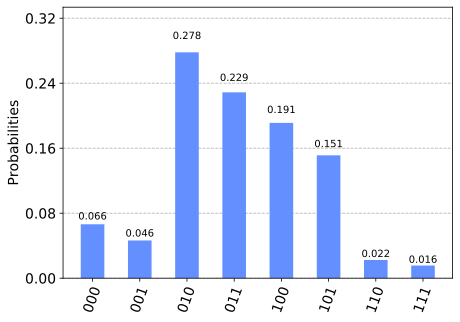

{'010': 695, '111': 39, '110': 56, '000': 166, '101': 378, '001': 116, '011': 572, '100': 478}
Done
Job Status: job has successfully run


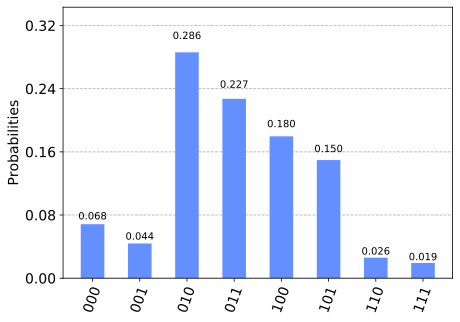

{'010': 715, '111': 48, '110': 65, '000': 171, '101': 374, '001': 110, '011': 568, '100': 449}
Done
Job Status: job has successfully run


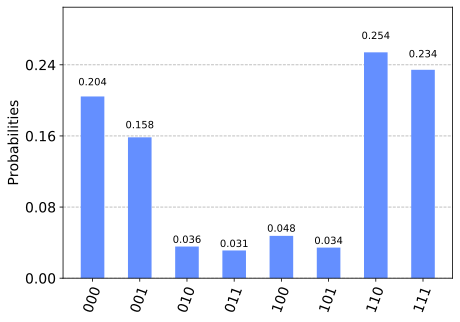

{'010': 89, '111': 586, '110': 635, '000': 511, '101': 86, '001': 396, '011': 78, '100': 119}
Done
Job Status: job has successfully run


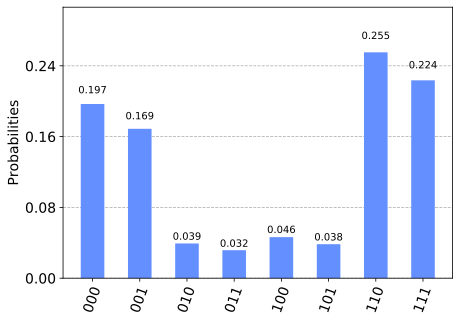

{'010': 98, '111': 559, '110': 638, '000': 492, '101': 96, '001': 422, '011': 79, '100': 116}
Done


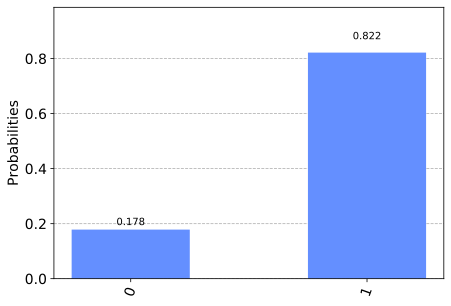

In [8]:
# transpile, plot circuit, run, plot result
backends = [simulator, device]

qcs = [qc1, qc2, qc3, qc4]
counts = np.zeros(4)
for be in backends:
    for qc in qcs:
        job = execute(qc, backend = be, shots=2500)
        if be == device:
            job_monitor(job)
        bits = [ '100', '000', '111', '101', '011', '001', '110', '010']        
        if qc == qc1:
            counts1 = job.result().get_counts()
            plot_histogram(counts1)
            for bit in bits:
                if bit not in counts1:
                    counts1[bit] = 0
            print(counts1)
        if qc == qc2:
            counts2 = job.result().get_counts()
            plot_histogram(counts2)
            for bit in bits:
                if bit not in counts2:
                    counts2[bit] = 0
            print(counts2)
        if qc == qc3:
            counts3 = job.result().get_counts()
            plot_histogram(counts3)
            for bit in bits:
                if bit not in counts3:
                    counts3[bit] = 0
            print(counts3)
        if qc == qc4:
            counts4 = job.result().get_counts()
            plot_histogram(counts4)
            for bit in bits:
                if bit not in counts4:
                    counts4[bit] = 0
            print(counts4)
        print('Done')
        ibmq_sim_results = job.result()
        ibmq_sim_counts = job.result().get_counts()
    if be == simulator:
        countssim = {'0': counts1["000"]+counts2["001"]+counts3["010"]+counts4["011"],'1': counts1["100"]+counts2["101"]+counts3["110"]+counts4["111"]}
        plot_histogram(countssim)
    else:
        countsdev = {'0': counts1["000"]+counts2["001"]+counts3["010"]+counts4["011"],'1': counts1["100"]+counts2["101"]+counts3["110"]+counts4["111"]}
        plot_histogram(countsdev)
   


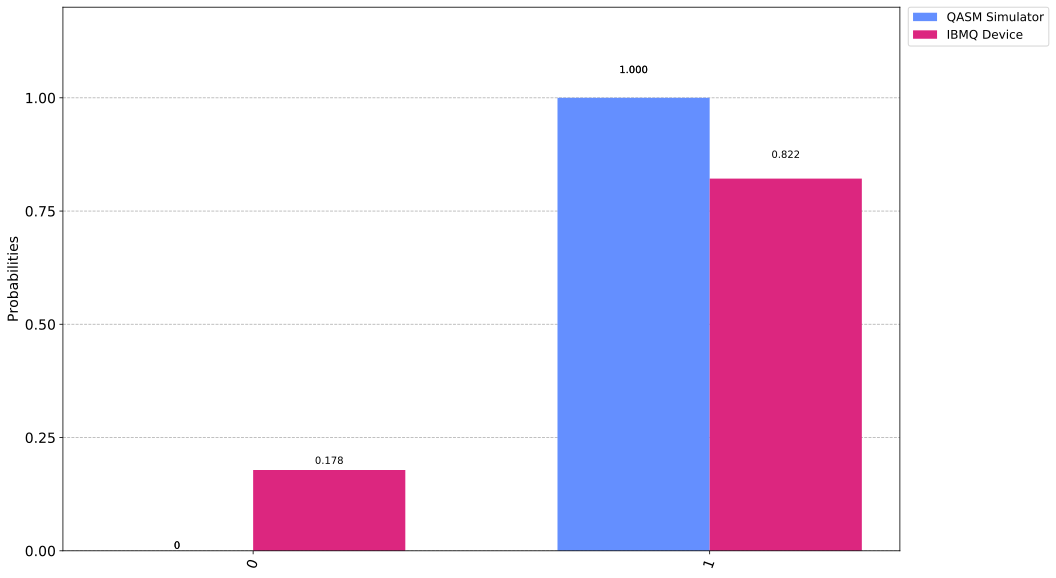

In [9]:
# plotting the results together
plot_histogram([countssim, countsdev],
               legend = ['QASM Simulator', 'IBMQ Device'],
               figsize = (15,10))